<a href="https://colab.research.google.com/github/Ali-Khamis45/seconedMlproject/blob/main/midPrjocetDotpy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Project Presentation
### [(Click to Open Slides)](https://docs.google.com/presentation/d/1sSVkJcq8UF2yRYqAZ4AsvVM0psYN4WH5/edit?slide=id.p1#slide=id.p1)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
data=pd.read_csv('/content/loan_data.csv')
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
data.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.shape

(45000, 14)

Business Questions

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
data = pd.read_csv('loan_data.csv')
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('loan_data.csv')

df_cleaned = df[
    (df['person_age'] < 100) &
    (df['person_emp_exp'] < 100)
]

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


/tmp/ipython-input-207627913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


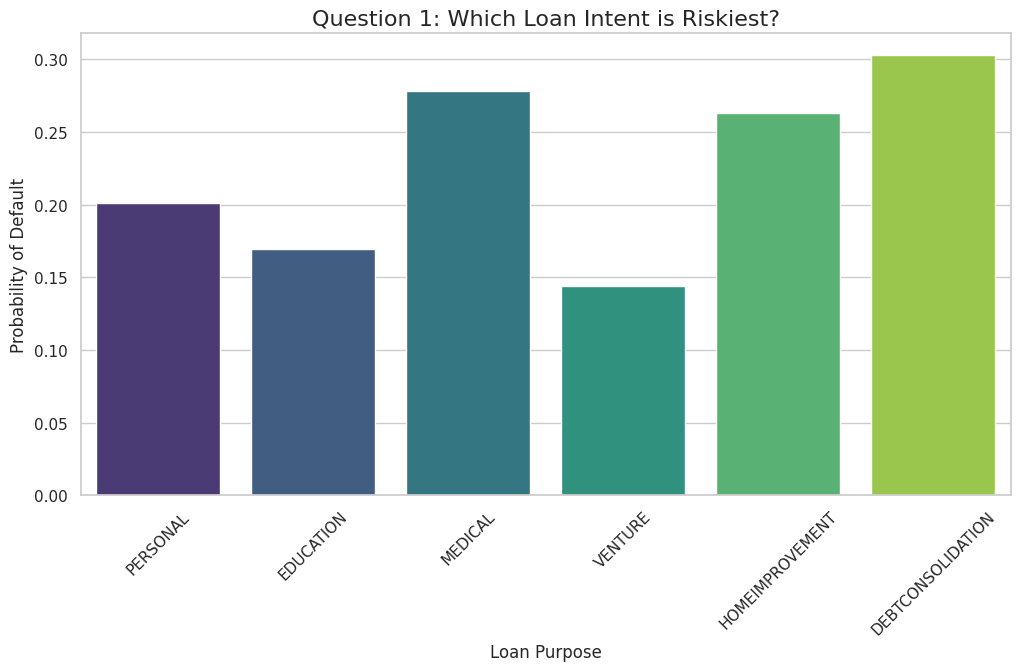

In [ ]:
plt.figure()

sns.barplot(
    data=df_cleaned,
    x='loan_intent',
    y='loan_status',
    palette='viridis',
    errorbar=None
)

plt.title('Question 1: Which Loan Intent is Riskiest?', fontsize=16)
plt.xlabel('Loan Purpose')
plt.ylabel('Probability of Default')
plt.xticks(rotation=45)

plt.show()


/tmp/ipython-input-1003575761.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


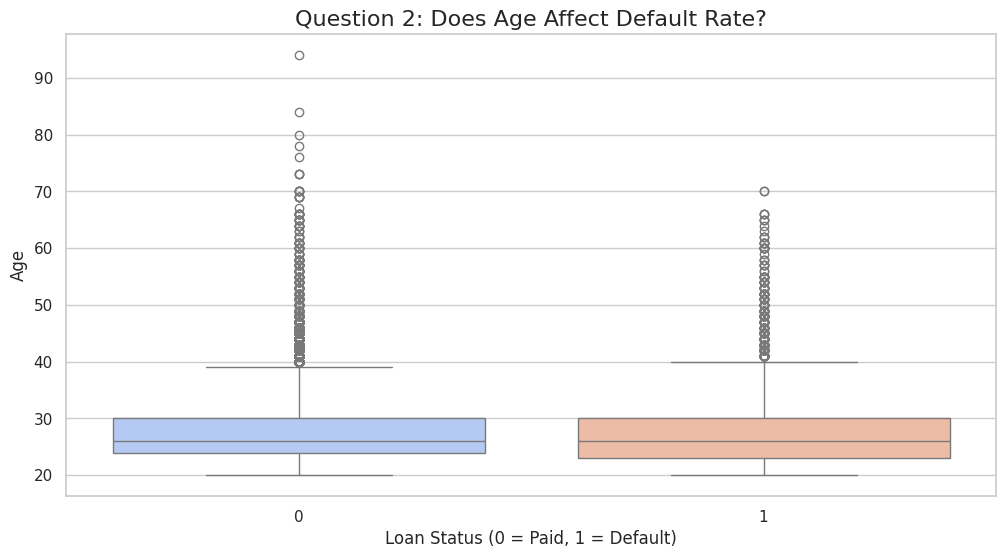

In [ ]:
plt.figure()

sns.boxplot(
    data=df_cleaned,
    x='loan_status',
    y='person_age',
    palette='coolwarm'
)

plt.title('Question 2: Does Age Affect Default Rate?', fontsize=16)
plt.xlabel('Loan Status (0 = Paid, 1 = Default)')
plt.ylabel('Age')

plt.show()


/tmp/ipython-input-1991286491.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


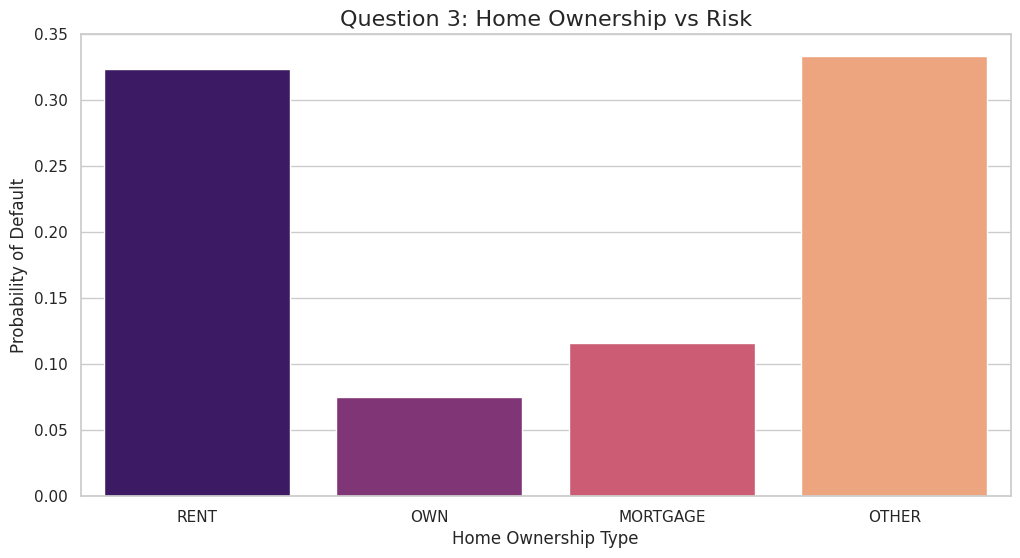

In [ ]:
plt.figure()

sns.barplot(
    data=df_cleaned,
    x='person_home_ownership',
    y='loan_status',
    palette='magma',
    errorbar=None
)

plt.title('Question 3: Home Ownership vs Risk', fontsize=16)
plt.xlabel('Home Ownership Type')
plt.ylabel('Probability of Default')

plt.show()


/tmp/ipython-input-4119051521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


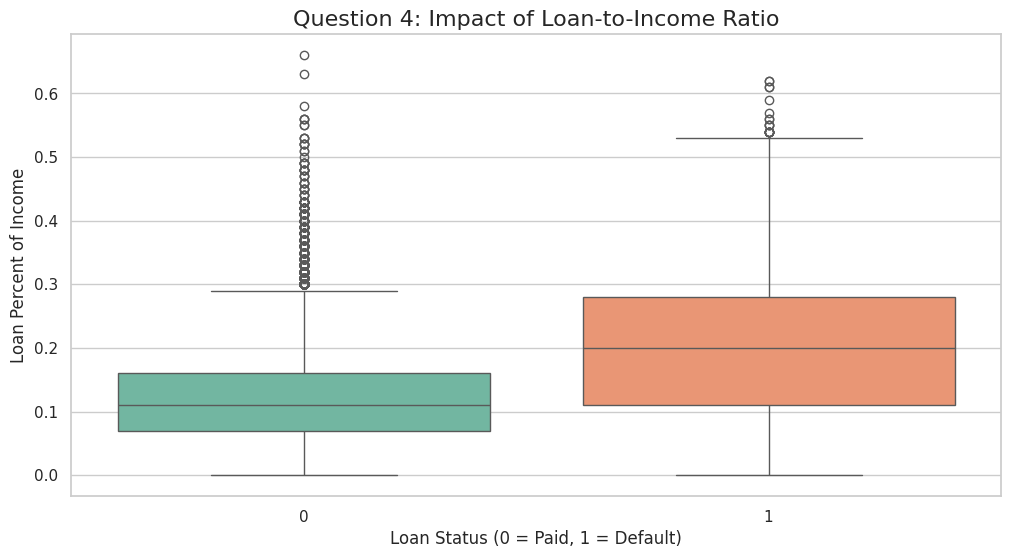

In [ ]:
plt.figure()

sns.boxplot(
    data=df_cleaned,
    x='loan_status',
    y='loan_percent_income',
    palette='Set2'
)

plt.title('Question 4: Impact of Loan-to-Income Ratio', fontsize=16)
plt.xlabel('Loan Status (0 = Paid, 1 = Default)')
plt.ylabel('Loan Percent of Income')

plt.show()


/tmp/ipython-input-2678524842.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


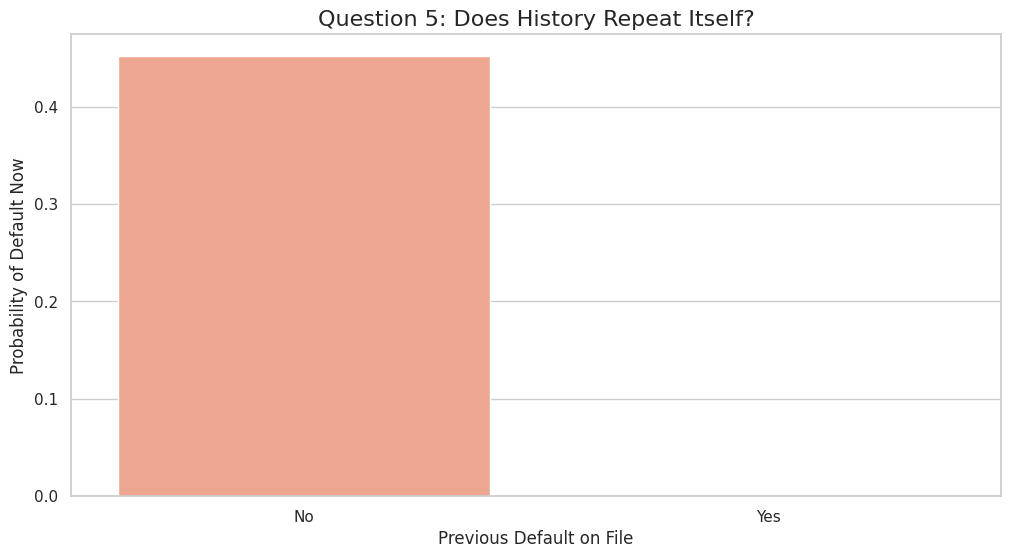

In [ ]:
plt.figure()

sns.barplot(
    data=df_cleaned,
    x='previous_loan_defaults_on_file',
    y='loan_status',
    palette='Reds',
    errorbar=None
)

plt.title('Question 5: Does History Repeat Itself?', fontsize=16)
plt.xlabel('Previous Default on File')
plt.ylabel('Probability of Default Now')

plt.show()


In [ ]:
data_cleaned = data[(data['person_age'] < 100) & (data['person_emp_exp'] < 100)].copy()
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)

In [ ]:
X = data_encoded.drop('loan_status', axis=1)
y = data_encoded['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}
results = []
print("hold on for a sec")

for name, model in models.items():
    if name in ["Logistic Regression", "KNN"]:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results.append({"Model": name, "Accuracy": acc})
    print(f"✅ {name}: Accuracy = {acc:.2%}")
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\n--- Model Comparison Report ---")
print(results_df)

hold on for a sec
✅ Logistic Regression: Accuracy = 89.91%
✅ Decision Tree: Accuracy = 90.35%
✅ Random Forest: Accuracy = 92.90%
✅ Gradient Boosting: Accuracy = 92.37%
✅ KNN: Accuracy = 89.17%

--- Model Comparison Report ---
                 Model  Accuracy
2        Random Forest  0.928992
3    Gradient Boosting  0.923658
1        Decision Tree  0.903545
0  Logistic Regression  0.899100
4                  KNN  0.891655


In [ ]:
print("enhancement in progress")

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_acc = accuracy_score(y_test, best_model.predict(X_test))
print(f"\n🎯 Best Model Accuracy: {best_acc:.2%}")
print(f"Best Parameters: {grid_search.best_params_}")
joblib.dump(best_model, 'loan_model_final.pkl')
print("it saved as : loan_model_final.pkl")

enhancement in progress

🎯 Best Model Accuracy: 92.94%
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
it saved as : loan_model_final.pkl


In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
import joblib

def predict_loan_status(age, gender, education, income, emp_exp, home_ownership,
                        loan_amt, intent, int_rate, percent_income, cred_hist, credit_score, prev_default):

    data = {
        'person_age': [age],
        'person_income': [income],
        'person_emp_exp': [emp_exp],
        'loan_amnt': [loan_amt],
        'loan_int_rate': [int_rate],
        'loan_percent_income': [percent_income],
        'cb_person_cred_hist_length': [cred_hist],
        'credit_score': [credit_score],
        'person_gender_male': [1 if gender == 'Male' else 0],
        'person_education_Bachelor': [1 if education == 'Bachelor' else 0],
        'person_education_Doctorate': [1 if education == 'Doctorate' else 0],
        'person_education_High School': [1 if education == 'High School' else 0],
        'person_education_Master': [1 if education == 'Master' else 0],
        'person_home_ownership_OTHER': [1 if home_ownership == 'OTHER' else 0],
        'person_home_ownership_OWN': [1 if home_ownership == 'OWN' else 0],
        'person_home_ownership_RENT': [1 if home_ownership == 'RENT' else 0],
        'loan_intent_EDUCATION': [1 if intent == 'EDUCATION' else 0],
        'loan_intent_HOMEIMPROVEMENT': [1 if intent == 'HOMEIMPROVEMENT' else 0],
        'loan_intent_MEDICAL': [1 if intent == 'MEDICAL' else 0],
        'loan_intent_PERSONAL': [1 if intent == 'PERSONAL' else 0],
        'loan_intent_VENTURE': [1 if intent == 'VENTURE' else 0],
        'previous_loan_defaults_on_file_Yes': [1 if prev_default == 'Yes' else 0]
    }

    input_df = pd.DataFrame(data)

    model_columns = [
        'person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
        'loan_int_rate', 'loan_percent_income',
        'cb_person_cred_hist_length', 'credit_score',
        'person_gender_male', 'person_education_Bachelor',
        'person_education_Doctorate', 'person_education_High School',
        'person_education_Master', 'person_home_ownership_OTHER',
        'person_home_ownership_OWN', 'person_home_ownership_RENT',
        'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
        'loan_intent_MEDICAL', 'loan_intent_PERSONAL',
        'loan_intent_VENTURE',
        'previous_loan_defaults_on_file_Yes'
    ]

    for col in model_columns:
        if col not in input_df.columns:
            input_df[col] = 0

    input_df = input_df[model_columns]

    prediction = best_model.predict(input_df)[0]
    probability = best_model.predict_proba(input_df)[0][1]

    result = "Rejected (Risky)" if prediction == 1 else "Approved (Safe)"
    return f"{result}\nDefault Probability: {probability:.2%}"

iface = gr.Interface(
    fn=predict_loan_status,
    inputs=[
        gr.Number(label="Age", value=25),
        gr.Radio(["Male", "Female"], label="Gender"),
        gr.Dropdown(["High School", "Associate", "Bachelor", "Master", "Doctorate"], label="Education"),
        gr.Number(label="Annual Income", value=50000),
        gr.Number(label="Experience (Years)", value=2),
        gr.Radio(["RENT", "OWN", "MORTGAGE", "OTHER"], label="Home Ownership"),
        gr.Number(label="Loan Amount", value=10000),
        gr.Dropdown(
            ["PERSONAL", "EDUCATION", "MEDICAL", "VENTURE", "HOMEIMPROVEMENT", "DEBTCONSOLIDATION"],
            label="Loan Intent"
        ),
        gr.Number(label="Interest Rate", value=10.0),
        gr.Number(label="Loan to Income Ratio", value=0.2),
        gr.Number(label="Credit History Length", value=5),
        gr.Number(label="Credit Score", value=650),
        gr.Radio(["Yes", "No"], label="Previous Default")
    ],
    outputs="text",
    title="Loan Approval Bancking System",
    description="Enter customer data to predict loan approval status."
)

iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1acebe195463fc1e8d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
